In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
font = {'size'   : 20}
mpl.rc('font', **font)

In [126]:
base_dir = "../data/shaper_vref_scan/run_20190905_153206/" # no ped adj
base_dir = "../data/shaper_vref_scan/run_20190905_180020/" # with individual ch adjustment

fname = base_dir + "/dataframe.h5" # inv Vref at ff

In [127]:
df_chans = pd.read_hdf(fname)

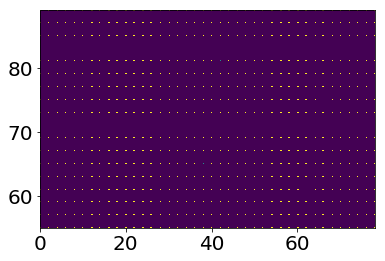

In [128]:
r = plt.hist2d(df_chans.vref_noInv, df_chans.vref_Inv, 255)

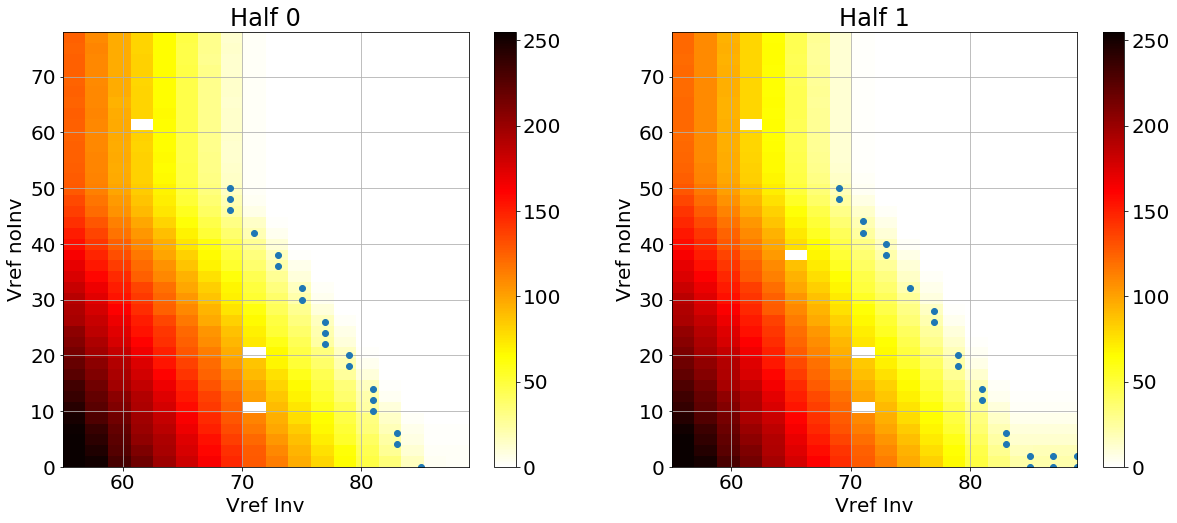

In [129]:
fig, axs = plt.subplots(1,2,figsize = (20,8))

for i in range(2):
    ax = axs[i]

    if i == 0:
        sel = df_chans.channel < 39
    elif i == 1:
        sel = df_chans.channel > 38
        
    df_sel = df_chans[sel]

    adc_vs_vref = df_sel.groupby(["vref_Inv","vref_noInv"])["adc"].mean().reset_index()

    bins1 = len(adc_vs_vref.vref_Inv.unique())
    bins2 = len(adc_vs_vref.vref_noInv.unique())

    x = adc_vs_vref.vref_Inv
    y = adc_vs_vref.vref_noInv
    z = adc_vs_vref.adc

    r = ax.hist2d(x,y, weights = z, 
                   bins = (bins1,bins2), cmap = "hot_r")

    sel = abs(adc_vs_vref.adc - 20) < 5
    ax.plot(x[sel], y[sel], "o")
    
    plt.colorbar(r[3], ax = ax)
    ax.set_title("Half %i" %i)    

for ax in axs:
    ax.set_xlabel("Vref Inv")
    ax.set_ylabel("Vref noInv")

    ax.grid()

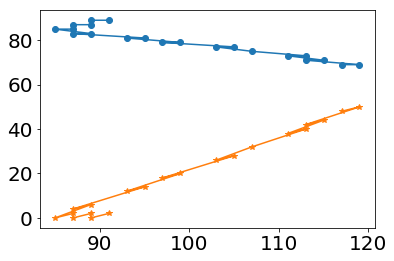

In [130]:
sel = abs(z - 20) < 5
sel &= x > 50
#sel &= z > 0
plt.plot((y+x)[sel], x[sel], "o-")
plt.plot((y+x)[sel], y[sel], "*-")

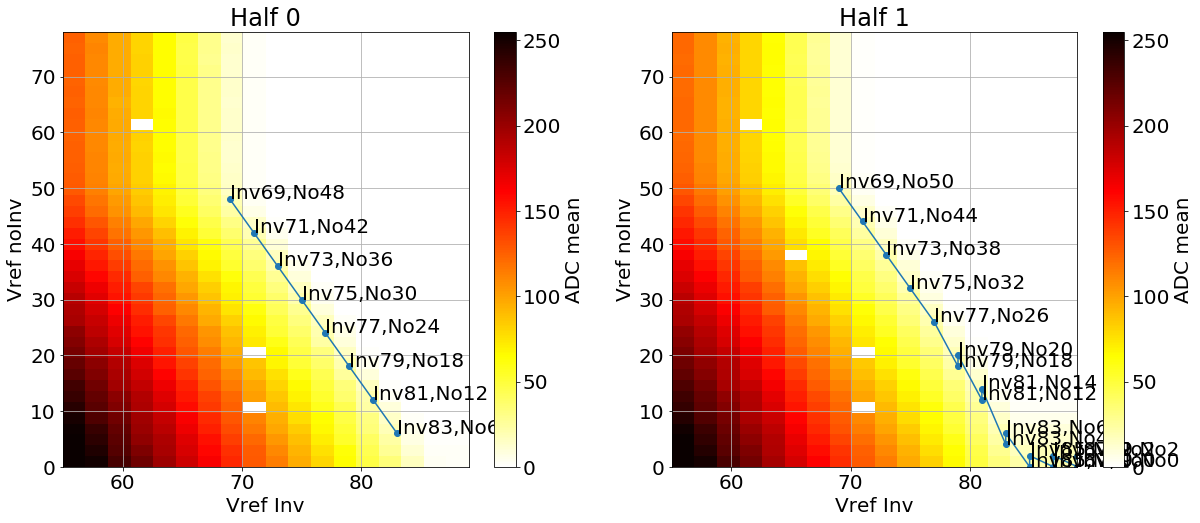

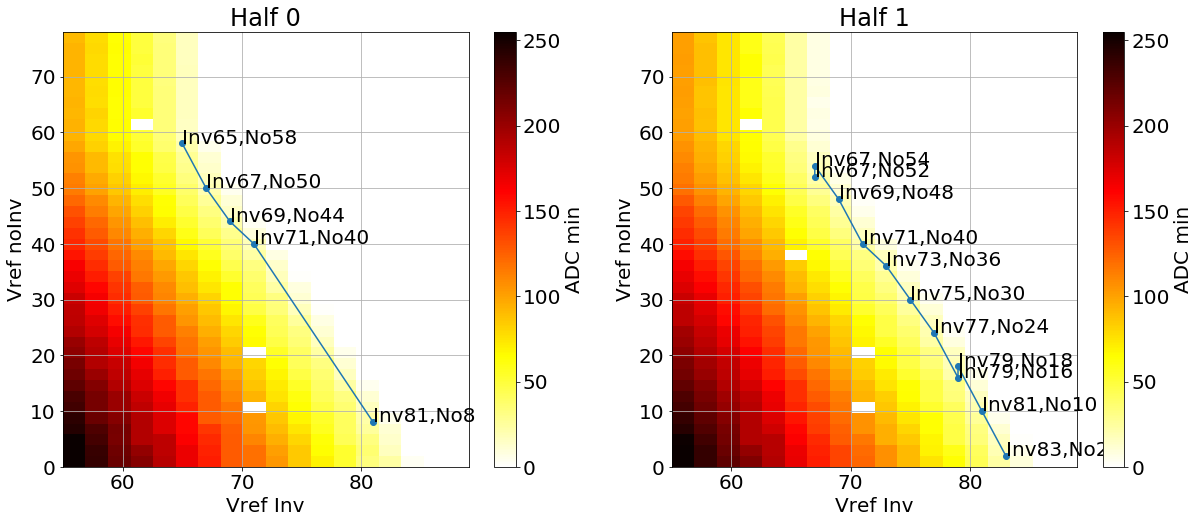

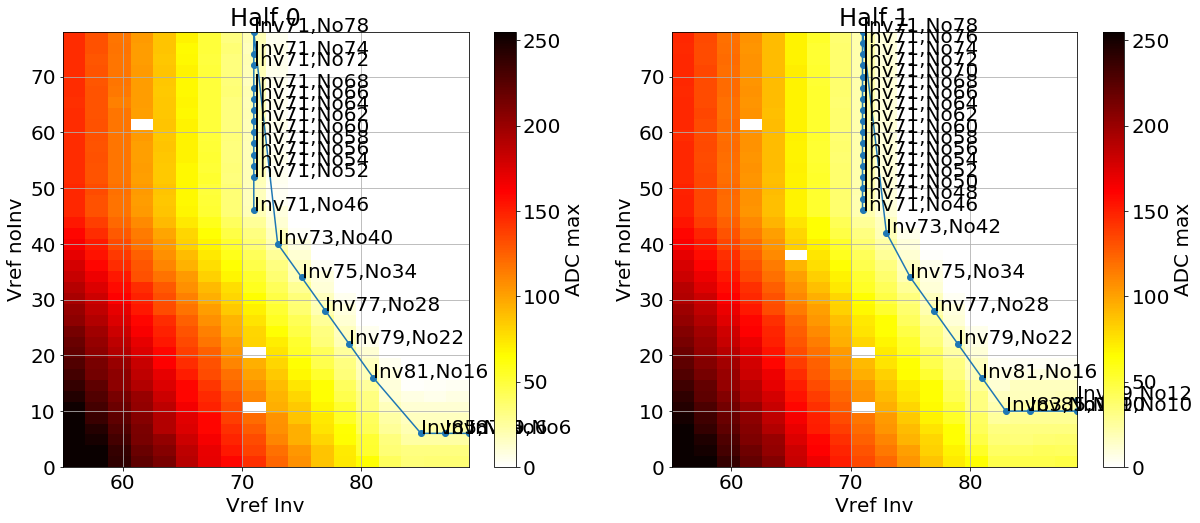

In [160]:
for meth in ["mean","min","max"]:
    
    fig, axs = plt.subplots(1,2,figsize = (20,8))

    for i in range(2):
        ax = axs[i]

        if i == 0:
            sel = df_chans.channel < 39
        elif i == 1:
            sel = df_chans.channel > 38

        df_sel = df_chans[sel]

        adc_vs_vref = df_sel.groupby(["vref_Inv","vref_noInv"])["adc"].agg(meth).reset_index()

        bins1 = len(adc_vs_vref.vref_Inv.unique())
        bins2 = len(adc_vs_vref.vref_noInv.unique())

        x = adc_vs_vref.vref_Inv
        y = adc_vs_vref.vref_noInv
        z = adc_vs_vref.adc

        r = ax.hist2d(x,y, weights = z, 
                       bins = (bins1,bins2), cmap = "hot_r")

        sel = abs(adc_vs_vref.adc - 20) < 3
#         sel &= y < 150
#         sel &= x > 100
        ax.plot(x[sel], y[sel], "o-")

        plt.colorbar(r[3], ax = ax, label = "ADC " + meth)
        ax.set_title("Half %i" %i)  
        
        for x,y,z in zip(x[sel],y[sel],z[sel]):
            #ax.text(x,y,"Inv %i, No %i\nADC %i" %(int(x),int(y),int(z)))
            ax.text(x,y,"Inv%i,No%i" %(int(x),int(y)))
            
    for ax in axs:
        ax.set_xlabel("Vref Inv")
        ax.set_ylabel("Vref noInv")

        ax.grid()

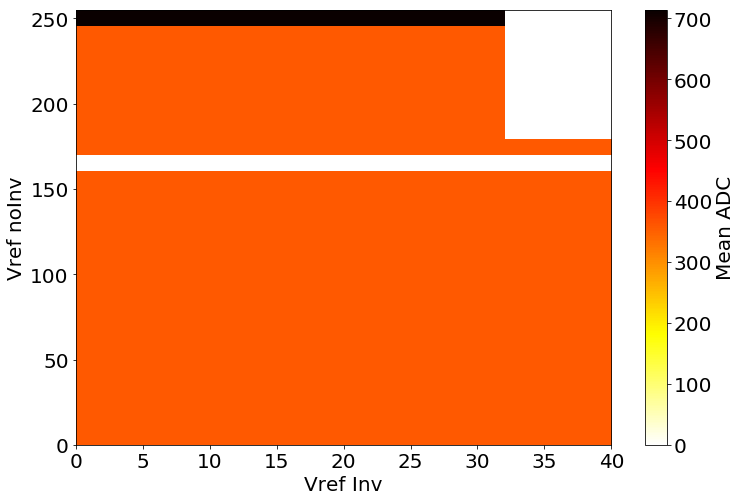

In [16]:
plt.figure(figsize = (12,8))

sel = df_chans.channel == 10
#sel = df_chans.channel > 39

df_sel = df_chans[sel]

adc_vs_vref = df_sel.groupby(["vref_Inv","vref_noInv"])["adc"].mean().reset_index()

bins1 = len(adc_vs_vref.vref_Inv.unique())
bins2 = len(adc_vs_vref.vref_noInv.unique())

x = adc_vs_vref.vref_Inv #- adc_vs_vref.vref_noInv
y = adc_vs_vref.vref_noInv
z = adc_vs_vref.adc

r = plt.hist2d(x,y, weights = z, 
               bins = (bins1,bins2), cmap = "hot_r")

sel = abs(adc_vs_vref.adc - 30) < 5
plt.plot(x[sel], y[sel], "o")

plt.xlabel("Vref Inv")
plt.ylabel("Vref noInv")

plt.colorbar(label = "Mean ADC")

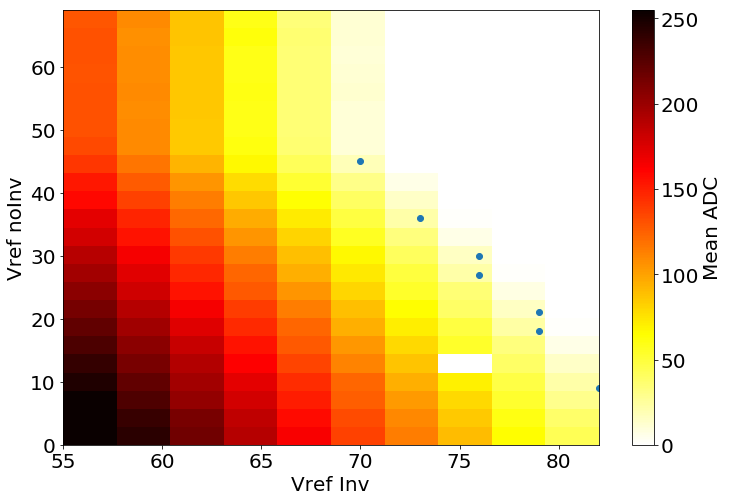

In [110]:
plt.figure(figsize = (12,8))

sel = df_chans.channel == 10
#sel = df_chans.channel > 39

df_sel = df_chans[sel]

adc_vs_vref = df_sel.groupby(["vref_Inv","vref_noInv"])["adc"].mean().reset_index()

bins1 = len(adc_vs_vref.vref_Inv.unique())
bins2 = len(adc_vs_vref.vref_noInv.unique())

x = adc_vs_vref.vref_Inv #- adc_vs_vref.vref_noInv
y = adc_vs_vref.vref_noInv
z = adc_vs_vref.adc

r = plt.hist2d(x,y, weights = z, 
               bins = (bins1,bins2), cmap = "hot_r")

sel = abs(adc_vs_vref.adc - 20) < 5
plt.plot(x[sel], y[sel], "o")

plt.xlabel("Vref Inv")
plt.ylabel("Vref noInv")

plt.colorbar(label = "Mean ADC")

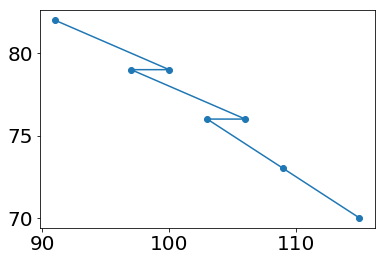

In [113]:
sel = abs(z - 20) < 5
sel &= x > 50
#sel &= z > 0
plt.plot((y+x)[sel], x[sel], "o-")

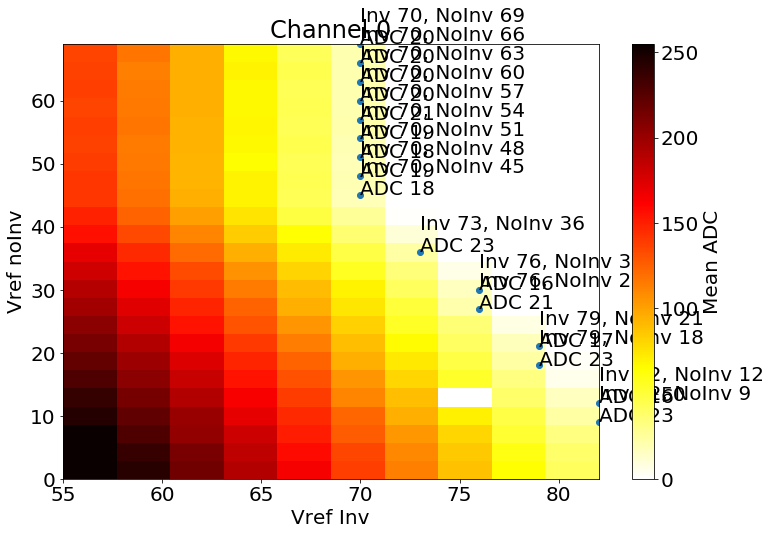

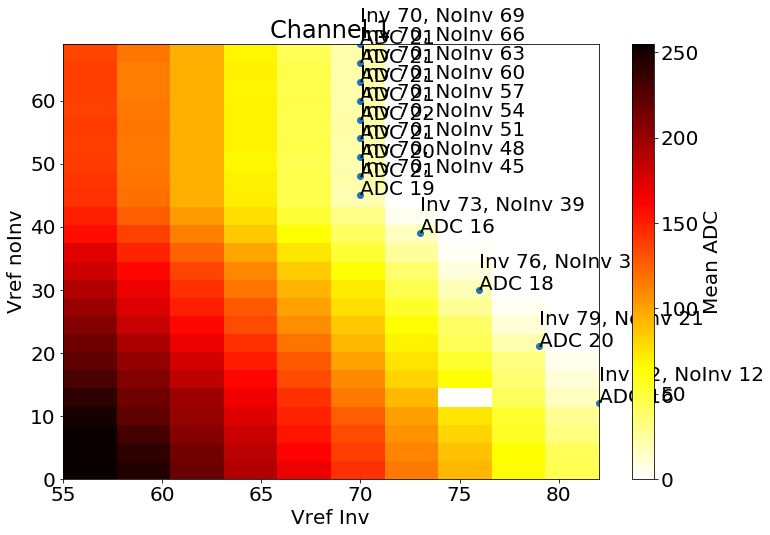

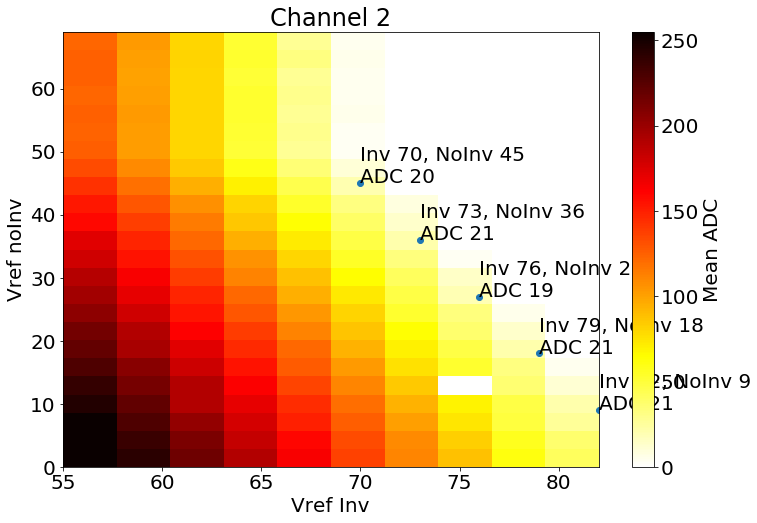

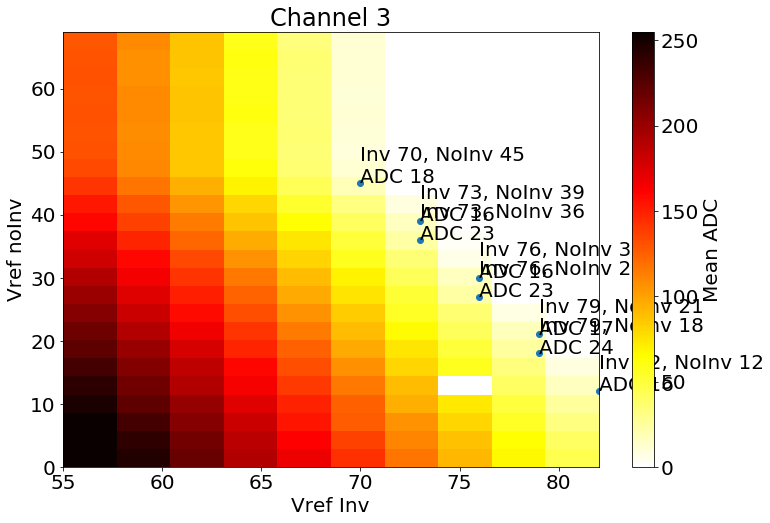

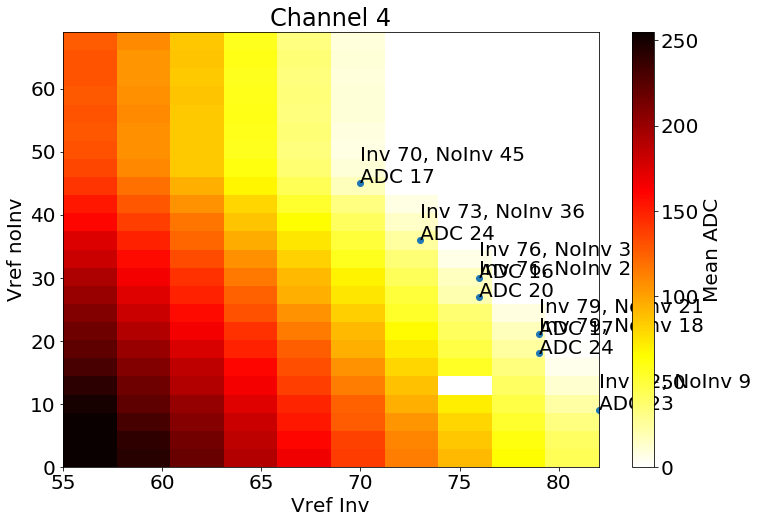

In [114]:
for chan in range(0,5,1):

    plt.figure(figsize = (12,8))
    plt.title("Channel %i" %chan)

    sel = df_chans.channel == chan
    sel &= df_chans.vref_noInv < 200
    
    df_sel = df_chans[sel]

    adc_vs_vref = df_sel.groupby(["vref_Inv","vref_noInv"])["adc"].median().reset_index()

    bins1 = len(adc_vs_vref.vref_Inv.unique())
    bins2 = len(adc_vs_vref.vref_noInv.unique())

    x = adc_vs_vref.vref_Inv
    y = adc_vs_vref.vref_noInv
    z = adc_vs_vref.adc
    
    r = plt.hist2d(x,y, weights = z, 
                   bins = (bins1,bins2), cmap = "hot_r")

    sel = abs(adc_vs_vref.adc - 20) < 5
    plt.plot(x[sel], y[sel], "o")
    
    #plt.text(150,100, x[sel].values)
    for x,y,z in zip(x[sel],y[sel],z[sel]):
        plt.text(x,y,"Inv %i, NoInv %i\nADC %i" %(int(x),int(y),int(z)))
    
    plt.xlabel("Vref Inv")
    plt.ylabel("Vref noInv")

    plt.colorbar(label = "Mean ADC")

In [65]:
z[sel]

310    20.5
328    16.7
345    15.4
361    24.3
Name: adc, dtype: float64

In [139]:
df_chans.vref_Inv.unique()

array([55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87,
       89])

In [140]:
df_chans.vref_noInv.unique()

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78])

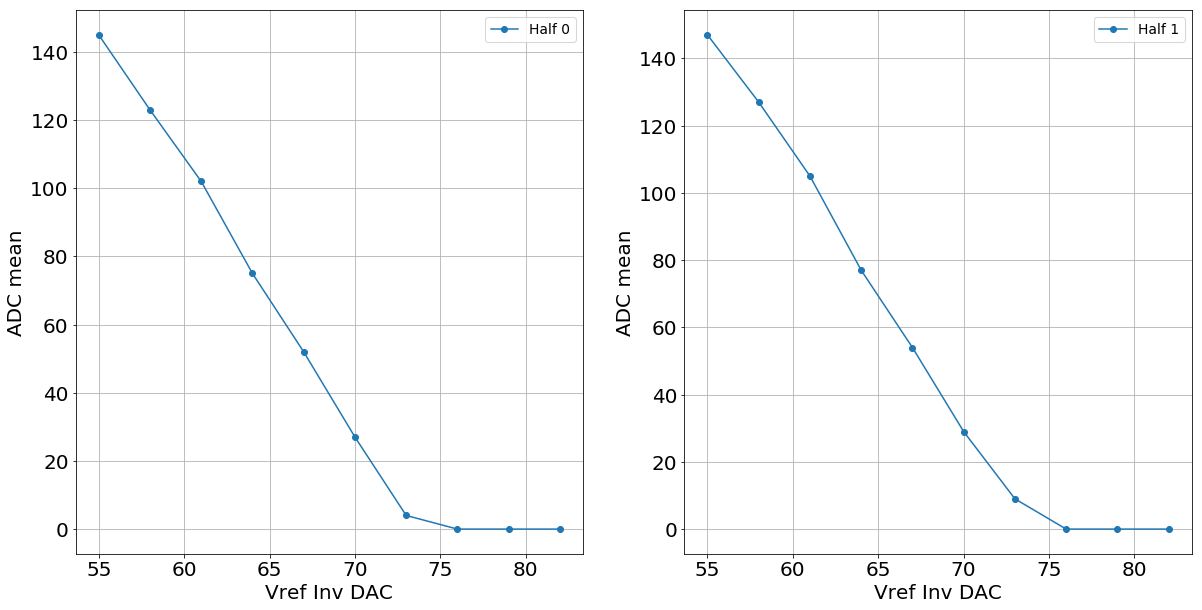

In [117]:
fig, axs = plt.subplots(1,2,figsize = (20,10))

for i in range(2):
    ax = axs[i]
    #chans = range(0,36,4) if i == 0 else range(39,78,4)
    if i == 0: sel = df_chans.channel < 39
    elif i == 1: sel = df_chans.channel > 38
        
    #sel &= df_chans.adc > 1

    sel &= df_chans.vref_noInv == 60
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("vref_Inv")["adc"].max()
    x = prof.index
    y = prof.values

    ped = 0
    ax.plot(x,y - ped,"o-", label = "Half %i" %i)
    
for ax in axs:
    ax.legend(ncol = 2, fontsize = "x-small")
    ax.set_xlabel("Vref Inv DAC")
    ax.set_ylabel("ADC mean")
    ax.grid()

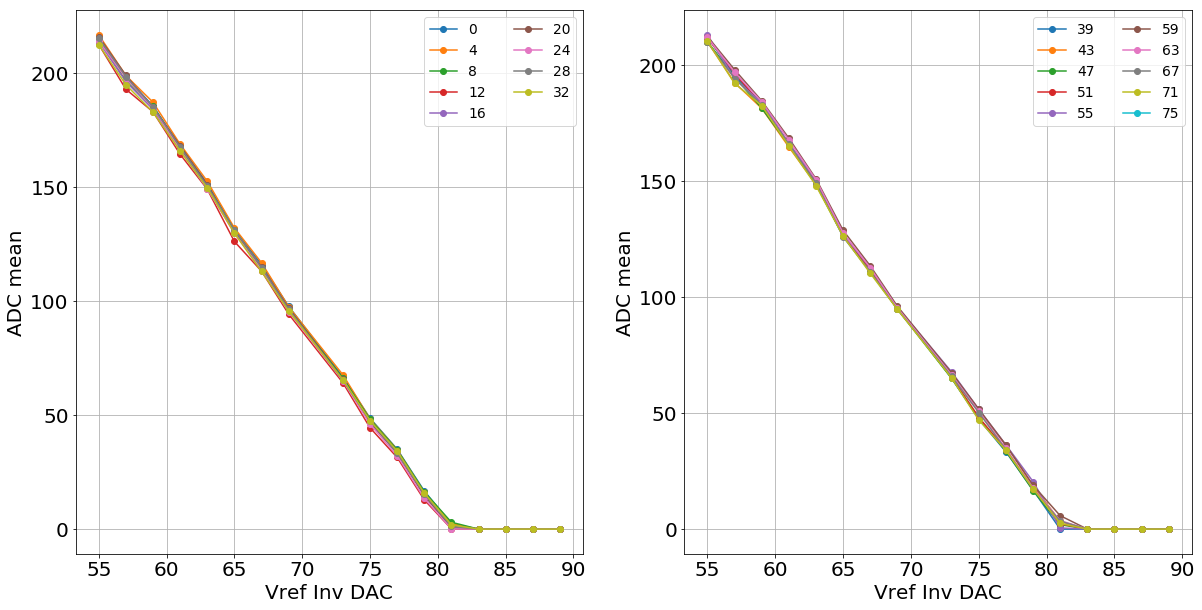

In [135]:
fig, axs = plt.subplots(1,2,figsize = (20,10))

for i in range(2):
    ax = axs[i]
    chans = range(0,36,4) if i == 0 else range(39,78,4)
    
    for chan in chans:
        #if chan > 35: chan += 3
        sel = df_chans.channel == chan
        sel &= df_chans.vref_noInv == 20
        df_sel = df_chans[sel]

        # profile
        prof = df_sel.groupby("vref_Inv")["adc"].mean()
        x = prof.index
        y = prof.values

        ped = 0
        ax.plot(x,y - ped,"o-", label = chan)
    
for ax in axs:
    ax.legend(ncol = 2, fontsize = "x-small")
    ax.set_xlabel("Vref Inv DAC")
    ax.set_ylabel("ADC mean")
    ax.grid()

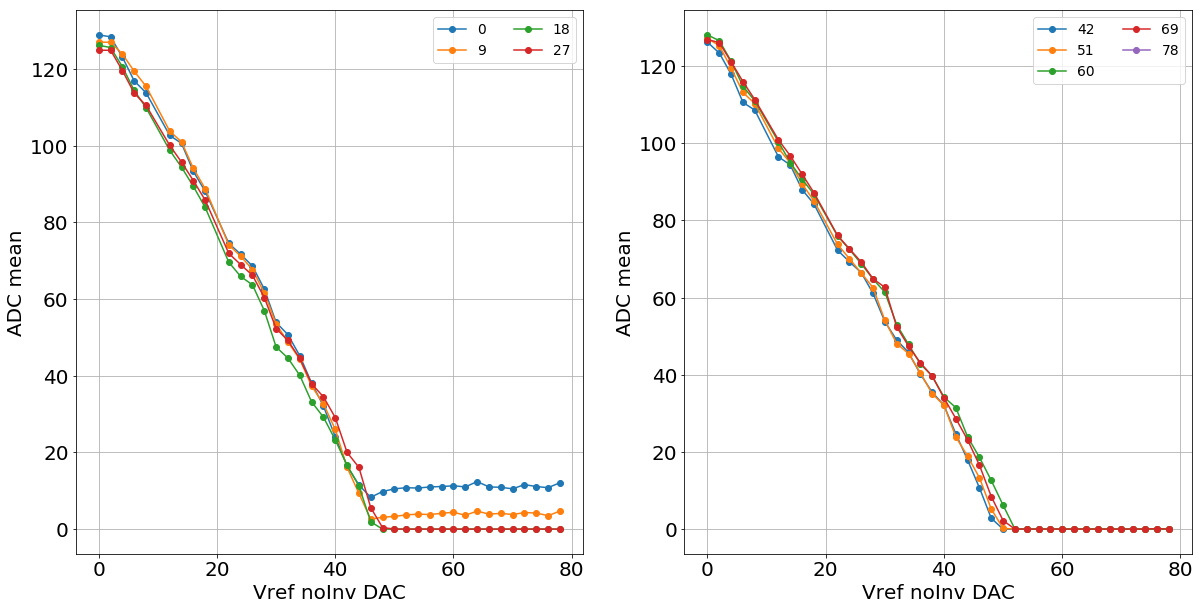

In [141]:
fig, axs = plt.subplots(1,2,figsize = (20,10))

for i in range(2):
    ax = axs[i]
    chans = range(0,36,9) if i == 0 else range(39,78,9)
    
    for chan in chans:
        if chan > 35: chan += 3
        sel = df_chans.channel == chan
        sel &= df_chans.vref_Inv == 71
        df_sel = df_chans[sel]

        # profile
        prof = df_sel.groupby("vref_noInv")["adc"].mean()
        x = prof.index
        y = prof.values

        ax.plot(x,y,"o-", label = chan)
    
for ax in axs:
    ax.legend(ncol = 2, fontsize = "x-small")
    ax.set_xlabel("Vref noInv DAC")
    ax.set_ylabel("ADC mean")
    ax.grid()

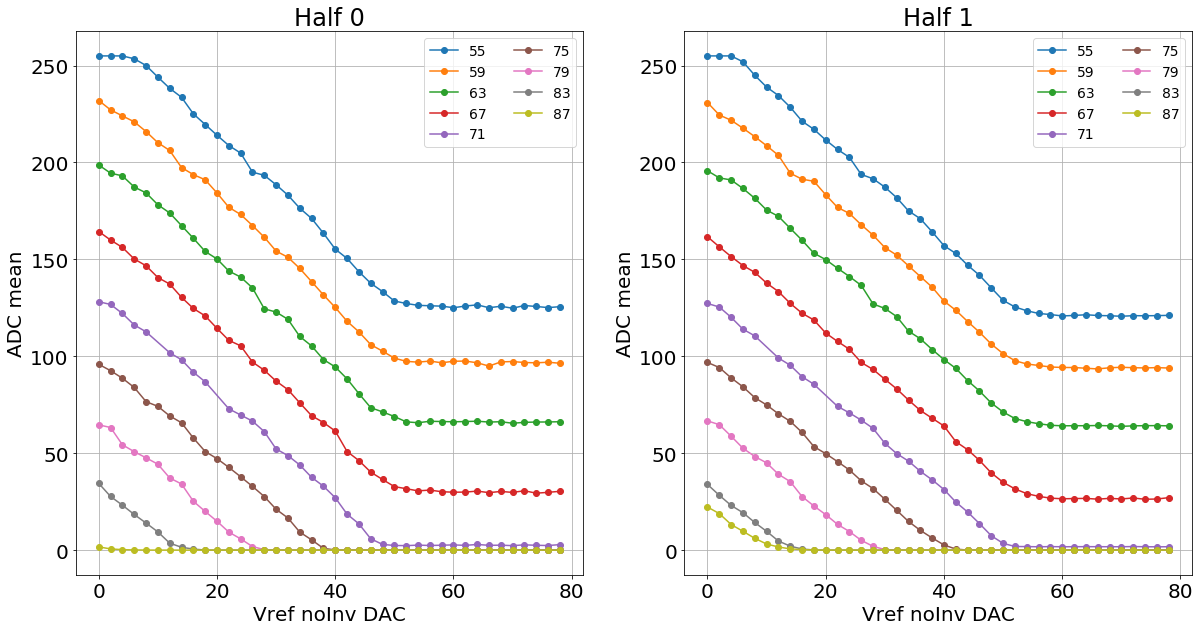

In [147]:
fig, axs = plt.subplots(1,2,figsize = (20,10))

vrefs = df_chans.vref_Inv.unique()[::2]

for i in range(2):
    ax = axs[i]
    ax.set_title("Half %i" %i)
    
    if i == 0: sel = df_chans.channel < 36
    else: sel = df_chans.channel > 35

    for vref in vrefs:

        df_sel = df_chans[sel & (df_chans.vref_Inv == vref)]

        # profile
        prof = df_sel.groupby("vref_noInv")["adc"].mean()
        x = prof.index
        y = prof.values

        ped = 0
        ax.plot(x,y - ped,"o-", label = vref)
    
for ax in axs:
    ax.legend(ncol = 2, fontsize = "x-small")
    ax.set_xlabel("Vref noInv DAC")
    ax.set_ylabel("ADC mean")
    ax.grid()

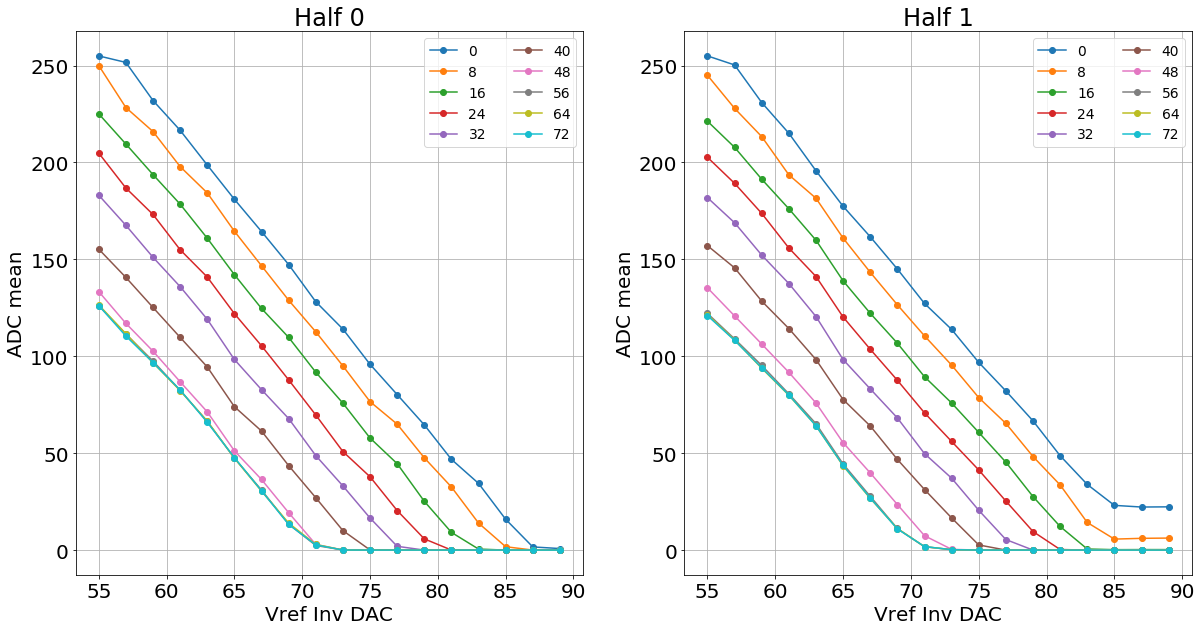

In [149]:
fig, axs = plt.subplots(1,2,figsize = (20,10))

vrefs = df_chans.vref_noInv.unique()[::4]

for i in range(2):
    ax = axs[i]
    ax.set_title("Half %i" %i)
    
    if i == 0: sel = df_chans.channel < 36
    else: sel = df_chans.channel > 35

    for vref in vrefs:

        df_sel = df_chans[sel & (df_chans.vref_noInv == vref)]

        # profile
        prof = df_sel.groupby("vref_Inv")["adc"].mean()
        x = prof.index
        y = prof.values

        ped = 0
        ax.plot(x,y - ped,"o-", label = vref)
    
for ax in axs:
    ax.legend(ncol = 2, fontsize = "x-small")
    ax.set_xlabel("Vref Inv DAC")
    ax.set_ylabel("ADC mean")
    ax.grid()